<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/Find_Disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find_Disorder.ipynb
---


> Indented block
Calculates the structural disorder in a spherical nanoparticle as a function of the radial distance from the center. This requires a perfectly unrelaxed lattice to compare to the relaxed/disordered lattice.

---

## Import Packages

In [8]:
import csv
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Helper Functions and Gloabl Variables

## Extract Data and Name Variables

In [9]:
file_unrelaxed = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Control/STRs/Sphere100_Au_onAu_voidless.stru"
file_relaxed = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/MC_Sphere100_Au_onAu_r25_2000Cycles/2000_voidless.stru"

plotTitle = r'Structural Disorder: MMC_Au_r25A'
plotsavename = r'Stru_Dis_MMC_Au_r25A.png'
#csvsavename = r'RMC_PtAu_CP.csv'

In [10]:
data1 = pd.read_csv(file_unrelaxed, skiprows=3)
data1 = data1.drop(data1.columns[3:], axis=1)
data1[["atoms", "x"]] = data1[data1.columns[0]].str.split(expand=True)
data1 = data1.drop(data1.columns[0], axis=1)
data1 = data1.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data1["x"] = data1["x"].astype(float)
data1["y"] = data1["y"].astype(float)
data1["z"] = data1["z"].astype(float)
data1["distance"] = np.sqrt((data1["x"]*data1["x"] + data1["y"]*data1["y"] + data1["z"]*data1["z"])*(4.0789*4.0789))

In [11]:
data2 = pd.read_csv(file_relaxed, skiprows=3)
data2 = data2.drop(data2.columns[3:], axis=1)
data2[["atoms", "x"]] = data2[data2.columns[0]].str.split(expand=True)
data2 = data2.drop(data2.columns[0], axis=1)
data2 = data2.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data2["x"] = data2["x"].astype(float)
data2["y"] = data2["y"].astype(float)
data2["z"] = data2["z"].astype(float)
data2["distance"] = np.sqrt((data2["x"]*data2["x"] + data2["y"]*data2["y"] + data2["z"]*data2["z"])*(4.0789*4.0789))

In [12]:
data1

,y,z,atom,x,distance
0,-2.5,-5.5,AU,-1.0,24.978059
1,-2.5,-5.5,AU,0.0,24.642768
2,-2.5,-5.5,AU,1.0,24.978059
3,-1.5,-5.5,AU,-2.0,24.642768
4,-2.0,-5.5,AU,-1.5,24.642768
...,...,...,...,...,...
3920,0.5,6.0,AU,-0.5,24.642768
3921,0.0,6.0,AU,0.0,24.473400
3922,0.5,6.0,AU,0.5,24.642768
3923,0.0,6.0,AU,1.0,24.810980


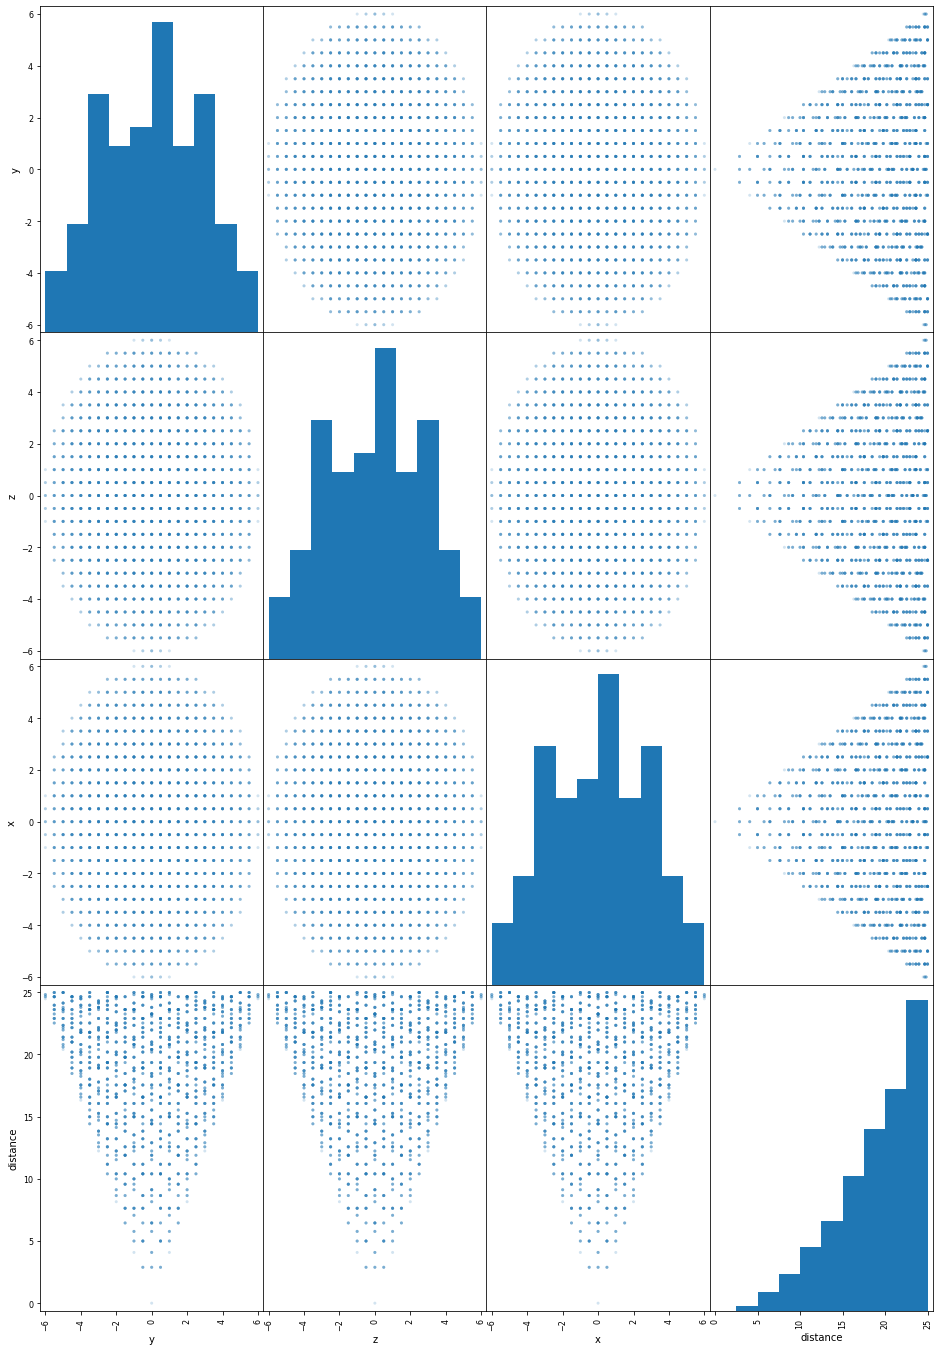

In [13]:
pd.plotting.scatter_matrix(data1, alpha=.2, figsize=(16,24));

In [14]:
data2

,y,z,atom,x,distance
0,-2.555274,-5.574285,AU,-1.027780,25.360923
1,-2.642584,-5.573366,AU,-0.072555,25.160870
2,-2.532225,-5.578374,AU,0.985021,25.309134
3,-1.605065,-5.551569,AU,-2.069476,25.037564
4,-2.105332,-5.540554,AU,-1.558383,24.997607
...,...,...,...,...,...
3920,0.497231,6.063310,AU,-0.440346,24.879575
3921,0.002966,6.074137,AU,0.064384,24.777192
3922,0.488221,6.080080,AU,0.598935,24.999516
3923,-0.007742,6.080539,AU,1.096990,25.202322


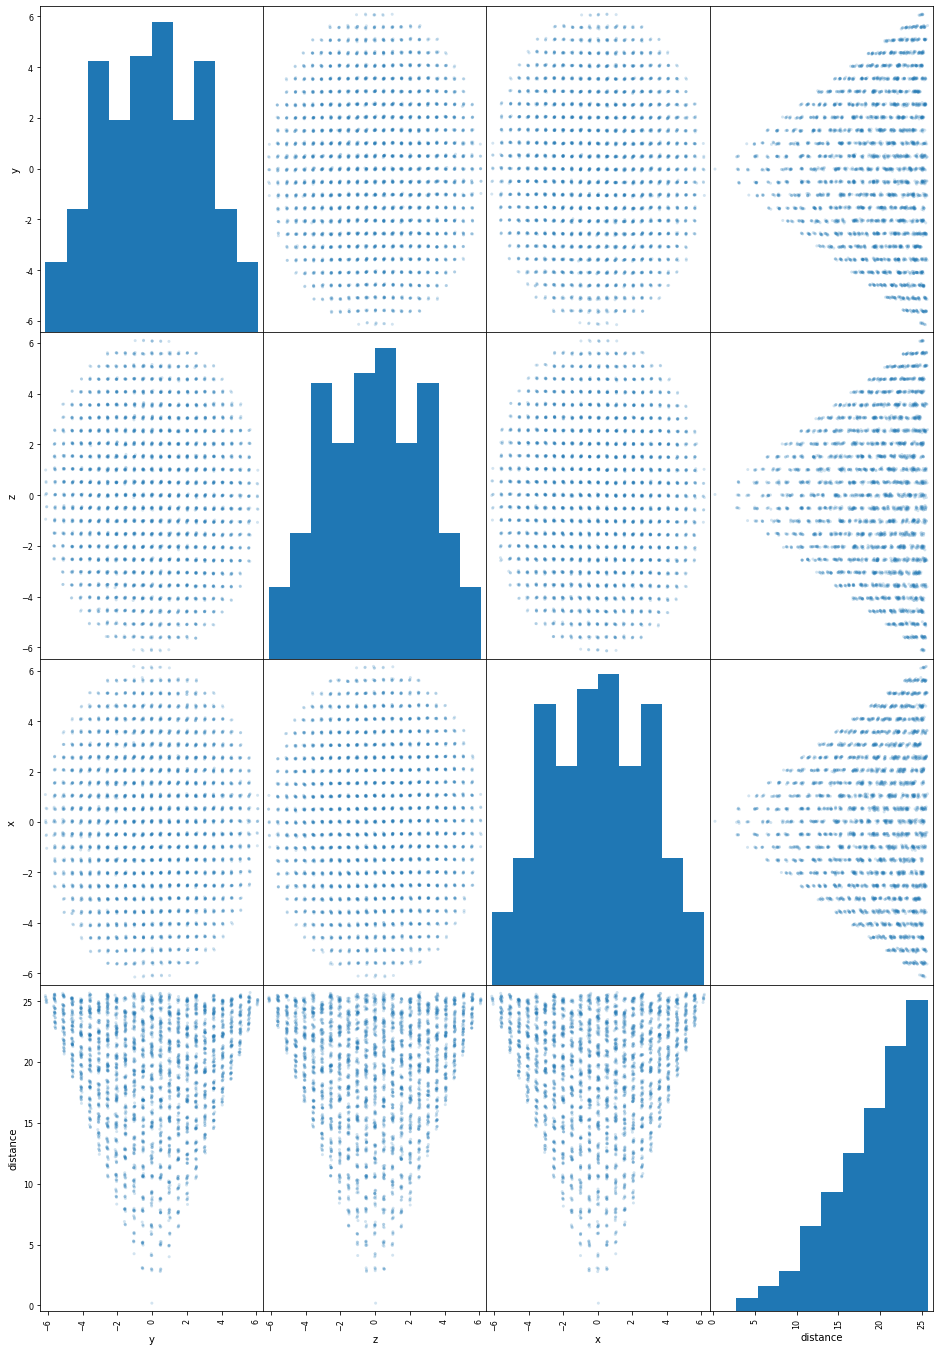

In [15]:
pd.plotting.scatter_matrix(data2, alpha=.2, figsize=(16,24));

In [16]:
data_total = pd.concat([data1, data2], axis=1)

In [17]:
data_total

,y,z,atom,x,distance,y,z,atom,x,distance
0,-2.5,-5.5,AU,-1.0,24.978059,-2.555274,-5.574285,AU,-1.027780,25.360923
1,-2.5,-5.5,AU,0.0,24.642768,-2.642584,-5.573366,AU,-0.072555,25.160870
2,-2.5,-5.5,AU,1.0,24.978059,-2.532225,-5.578374,AU,0.985021,25.309134
3,-1.5,-5.5,AU,-2.0,24.642768,-1.605065,-5.551569,AU,-2.069476,25.037564
4,-2.0,-5.5,AU,-1.5,24.642768,-2.105332,-5.540554,AU,-1.558383,24.997607
...,...,...,...,...,...,...,...,...,...,...
3920,0.5,6.0,AU,-0.5,24.642768,0.497231,6.063310,AU,-0.440346,24.879575
3921,0.0,6.0,AU,0.0,24.473400,0.002966,6.074137,AU,0.064384,24.777192
3922,0.5,6.0,AU,0.5,24.642768,0.488221,6.080080,AU,0.598935,24.999516
3923,0.0,6.0,AU,1.0,24.810980,-0.007742,6.080539,AU,1.096990,25.202322
